In [1]:
import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime
%matplotlib inline
f = open(os.devnull, 'w')
sys.stdout = f

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def sum_throughput(trace):
    s = []
    for t in trace:
        trace = pd.read_table(t, header=None, sep=(","),names=("seconds", "rate"))
        if len(s) == 0:   
            s = trace
        else:
            s += trace
    return s


In [3]:
mantle = glob.glob("mantle*.csv")
single = glob.glob("single*.csv")
isolated = glob.glob("isolate*.csv")
mantle_push = glob.glob("mds-zlog-seq-pushbutton/single*.csv")                    
recovery = glob.glob("mds-zlog-seq-recovery/single*.csv")

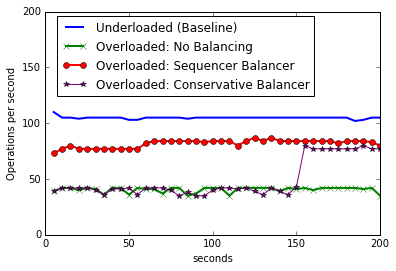

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = range(0, 481, 5)

s = sum_throughput(isolated)
ax.plot(x, s['rate'], 'b-', linewidth=2.0, label="Underloaded (Baseline)")

s = sum_throughput(single)
ax.plot(x, s['rate'], 'g-', linewidth=2.0, marker='x', label="Overloaded: No Balancing")

s = sum_throughput(mantle)
ax.plot(x, s['rate'], 'r-', linewidth=2.0, marker='o', label="Overloaded: Sequencer Balancer")

s = sum_throughput(mantle_push)
ax.plot(x, s['rate'], 'y-', linewidth=1.0, marker='*', color='purple', label="Overloaded: Conservative Balancer")

#ax.set_xlim(0, 480)
ax.set_xlim(0, 200)
ax.set_ylim(0, 200)
ax.set_xlabel("seconds")
ax.set_ylabel("Operations per second")
lgd = ax.legend(loc='center', bbox_to_anchor=(0.42, 0.8))

plt.savefig('mantle-seq-thruput.png', dpi=300, bbox_inches='tight')

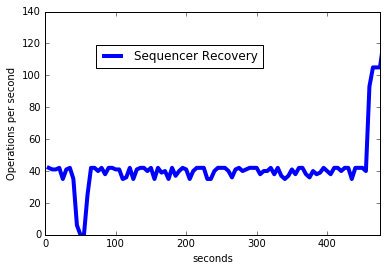

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

s = sum_throughput(recovery)
ax.plot(x, s['rate'], 'b-', linewidth=4.0, label="Sequencer Recovery")

ax.set_xlim(0, 475)
ax.set_xlabel("seconds")
ax.set_ylabel("Operations per second")
lgd = ax.legend(loc='center', bbox_to_anchor=(0.4, 0.8))

plt.savefig('recovery-seq-thruput.png', dpi=300, bbox_inches='tight')


In [8]:
s['rate']

0     NaN
1      42
2      41
3      41
4      42
5      35
6      41
7      42
8      35
9       6
10      0
11      0
12     25
13     42
14     42
15     40
16     42
17     38
18     42
19     42
20     41
21     41
22     35
23     36
24     42
25     35
26     41
27     42
28     42
29     40
     ... 
67     37
68     35
69     37
70     41
71     38
72     42
73     42
74     38
75     36
76     40
77     38
78     39
79     42
80     40
81     38
82     42
83     42
84     40
85     42
86     42
87     35
88     42
89     42
90     42
91     40
92     93
93    105
94    105
95    105
96    121
Name: rate, dtype: float64

In [25]:
mds0 = "cpu-issdm-15.out"
mds1 = "cpu-issdm-12.out"
mds2 = "cpu-issdm-10.out"

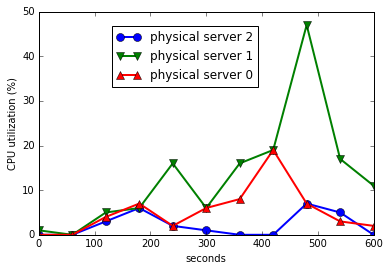

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111)

mds1_trace = pd.read_table(mds1, header=None, sep=(","),names=("seconds", "cpu"), skiprows=13)
x = range((0 - 32)*60, (len(mds1_trace['cpu']) - 32)*60, 60)
ax.plot(x, mds1_trace['cpu']*100, color='blue', marker='o', markersize=8, linewidth=2.0, label="physical server 2")

mds0_trace = pd.read_table(mds2, header=None, sep=(","),names=("seconds", "cpu"), skiprows=13)
x = range((0 - 32)*60, (len(mds0_trace['cpu']) - 32)*60, 60)
ax.plot(x, mds0_trace['cpu']*100, color='green', marker='v', markersize=8, linewidth=2.0, label="physical server 1")

mds2_trace = pd.read_table(mds0, header=None, sep=(","),names=("seconds", "cpu"), skiprows=13)
x = range((0 - 32)*60, (len(mds2_trace['cpu']) - 32)*60, 60)
ax.plot(x, mds2_trace['cpu']*100, color='red', marker='^', markersize=8, linewidth=2.0, label="physical server 0")

#ax.plot(mds0_trace['cpu']*100 + mds1_trace['cpu']*100 + mds2_trace['cpu']*100, 'g--', linewidth=2.0, label="total")

ax.set_xlim(0, 600)
#ax.set_ylim(0,40)
ax.set_xlabel("seconds")
ax.set_ylabel("CPU utilization (%)")
lgd = ax.legend(loc='center left', bbox_to_anchor=(0.2, 0.8))
plt.savefig('mantle-cpu-utilization.png', dpi=300, bbox_inches='tight')

In [17]:
mds0_trace.head()


,seconds,cpu
0,0: 1462851540,0.02
1,1: 1462851600,0.01
2,2: 1462851660,0.00
3,3: 1462851720,0.00
4,4: 1462851780,0.00


In [156]:
# Improvement of Mantle over No balancing
x = sum_throughput(single)
x['rate'].describe()

y = sum_throughput(mantle)
y['rate'].describe()

y['rate'].mean()/x['rate'].mean()

2.0248492159227984

In [161]:
# Degradation of Mantle over baseline
x = sum_throughput(mantle)
x['rate'].describe()

y = sum_throughput(isolated)
y['rate'].describe()

1 - x['rate'].mean()/y['rate'].mean()

0.16520787746170684